# Regression with a Flood Prediction Dataset

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor,BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor,VotingRegressor,StackingRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

2024-06-22 16:32:45.805209: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 16:32:45.805367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 16:32:45.971335: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Inspecting the DATA

In [2]:
df_train=pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
df_test=pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")
sample_sub=pd.read_csv("/kaggle/input/playground-series-s4e5/sample_submission.csv")

In [3]:
df_train=df_train.drop('id', axis=1)

In [4]:
df_train.head()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 5                   8                5              8   
1                 6                   7                4              4   
2                 6                   5                6              7   
3                 3                   4                6              5   
4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  Landslides  \
0              4  ...                5                     3           3   
1              6  ...                7                     2           0   
2              5  ...                7                     3           7   
3              8  ...                2                     4           7   
4              3  ...                2                     2           6   

   Watersheds  DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0           5                            4                7            5   
1           3                            5                3            3   
2           5                            6                8            2   
3           4                            4                6            5   
4           6                            4                1            2   

   InadequatePlanning  PoliticalFactors  FloodProbability  
0                   7                 3             0.445  
1                   4                 3             0.450  
2                   3                 3             0.530  
3                   7                 5             0.535  
4                   3                 5             0.415  

[5 rows x 21 columns]

In [5]:
df_train.describe(include='all')

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      1.117957e+06        1.117957e+06     1.117957e+06   1.117957e+06   
mean       4.921450e+00        4.926671e+00     4.955322e+00   4.942240e+00   
std        2.056387e+00        2.093879e+00     2.072186e+00   2.051689e+00   
min        0.000000e+00        0.000000e+00     0.000000e+00   0.000000e+00   
25%        3.000000e+00        3.000000e+00     4.000000e+00   4.000000e+00   
50%        5.000000e+00        5.000000e+00     5.000000e+00   5.000000e+00   
75%        6.000000e+00        6.000000e+00     6.000000e+00   6.000000e+00   
max        1.600000e+01        1.800000e+01     1.600000e+01   1.700000e+01   

       Urbanization  ClimateChange   DamsQuality     Siltation  \
count  1.117957e+06   1.117957e+06  1.117957e+06  1.117957e+06   
mean   4.942517e+00   4.934093e+00  4.955878e+00  4.927791e+00   
std    2.083391e+00   2.057742e+00  2.083063e+00  2.065992e+00   
min    0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.000000e+00   3.000000e+00  4.000000e+00  3.000000e+00   
50%    5.000000e+00   5.000000e+00  5.000000e+00  5.000000e+00   
75%    6.000000e+00   6.000000e+00  6.000000e+00  6.000000e+00   
max    1.700000e+01   1.700000e+01  1.600000e+01  1.600000e+01   

       AgriculturalPractices  Encroachments  ...  DrainageSystems  \
count           1.117957e+06   1.117957e+06  ...     1.117957e+06   
mean            4.942619e+00   4.949230e+00  ...     4.946893e+00   
std             2.068545e+00   2.083324e+00  ...     2.072333e+00   
min             0.000000e+00   0.000000e+00  ...     0.000000e+00   
25%             3.000000e+00   4.000000e+00  ...     4.000000e+00   
50%             5.000000e+00   5.000000e+00  ...     5.000000e+00   
75%             6.000000e+00   6.000000e+00  ...     6.000000e+00   
max             1.600000e+01   1.800000e+01  ...     1.700000e+01   

       CoastalVulnerability    Landslides    Watersheds  \
count          1.117957e+06  1.117957e+06  1.117957e+06   
mean           4.953999e+00  4.931376e+00  4.929032e+00   
std            2.088899e+00  2.078287e+00  2.082395e+00   
min            0.000000e+00  0.000000e+00  0.000000e+00   
25%            3.000000e+00  3.000000e+00  3.000000e+00   
50%            5.000000e+00  5.000000e+00  5.000000e+00   
75%            6.000000e+00  6.000000e+00  6.000000e+00   
max            1.700000e+01  1.600000e+01  1.600000e+01   

       DeterioratingInfrastructure  PopulationScore   WetlandLoss  \
count                 1.117957e+06     1.117957e+06  1.117957e+06   
mean                  4.925907e+00     4.927520e+00  4.950859e+00   
std                   2.064813e+00     2.074176e+00  2.068696e+00   
min                   0.000000e+00     0.000000e+00  0.000000e+00   
25%                   3.000000e+00     3.000000e+00  4.000000e+00   
50%                   5.000000e+00     5.000000e+00  5.000000e+00   
75%                   6.000000e+00     6.000000e+00  6.000000e+00   
max                   1.700000e+01     1.800000e+01  1.900000e+01   

       InadequatePlanning  PoliticalFactors  FloodProbability  
count        1.117957e+06      1.117957e+06      1.117957e+06  
mean         4.940587e+00      4.939004e+00      5.044803e-01  
std          2.081123e+00      2.090350e+00      5.102610e-02  
min          0.000000e+00      0.000000e+00      2.850000e-01  
25%          3.000000e+00      3.000000e+00      4.700000e-01  
50%          5.000000e+00      5.000000e+00      5.050000e-01  
75%          6.000000e+00      6.000000e+00      5.400000e-01  
max          1.600000e+01      1.600000e+01      7.250000e-01  

[8 rows x 21 columns]

In [6]:
df_train.dtypes

MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [7]:
df_train=df_train.astype(float)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  float64
 1   TopographyDrainage               1117957 non-null  float64
 2   RiverManagement                  1117957 non-null  float64
 3   Deforestation                    1117957 non-null  float64
 4   Urbanization                     1117957 non-null  float64
 5   ClimateChange                    1117957 non-null  float64
 6   DamsQuality                      1117957 non-null  float64
 7   Siltation                        1117957 non-null  float64
 8   AgriculturalPractices            1117957 non-null  float64
 9   Encroachments                    1117957 non-null  float64
 10  IneffectiveDisasterPreparedness  1117957 non-null  float64
 11  DrainageSystems                  1117957 non-null 

# Feature Engineering

In [9]:
def simplified_getFeats(df):
    num_cols = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']

    scaler = StandardScaler().fit(df[num_cols])
    df[num_cols] = scaler.transform(df[num_cols])  # Scale early

    # Basic Stats
    df['mean'] = df[num_cols].mean(axis=1)
    df['std'] = df[num_cols].std(axis=1)
    df['max'] = df[num_cols].max(axis=1)
    df['min'] = df[num_cols].min(axis=1)

    # Interaction Features (Simplified)
    df['Climate_Risk'] = df['MonsoonIntensity'] * df['ClimateChange']  
    df['Infrastructure_Risk'] = df['DamsQuality'] * df['DrainageSystems'] 

    return df

df_train['typ']=0
df_test['typ']=1
# Combine Data
df_all = pd.concat([df_train, df_test], axis=0)
df_all = simplified_getFeats(df_all)

# Split Back
df_train = df_all[df_all['typ'] == 0].drop(['typ'], axis=1)
df_test = df_all[df_all['typ'] == 1].drop(['typ'], axis=1)

# Prepare for Model
X = df_train.drop(['id', 'FloodProbability'], axis=1)
y = df_train['FloodProbability']


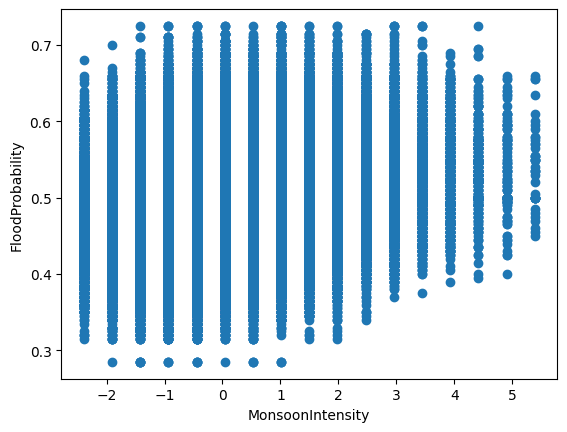

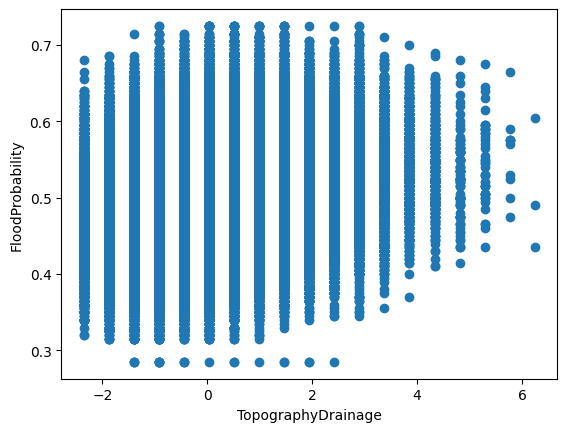

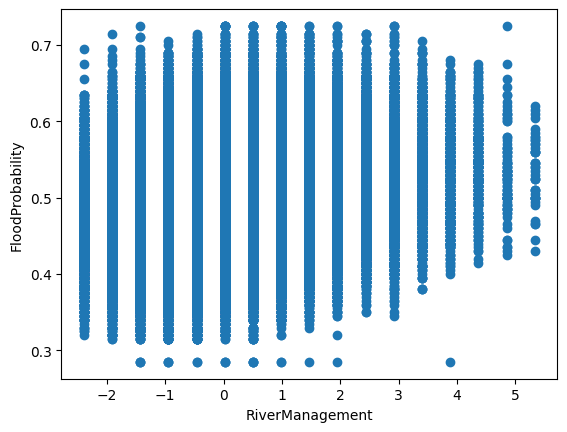

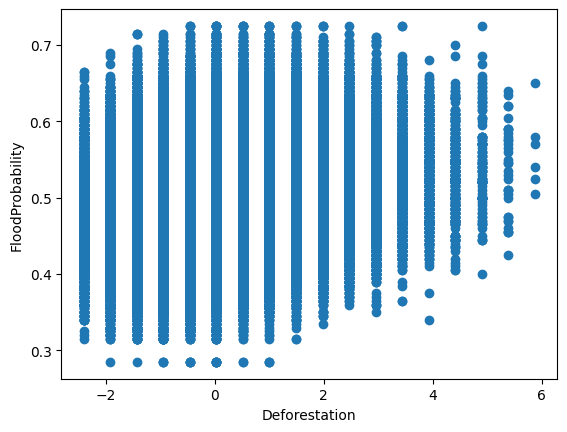

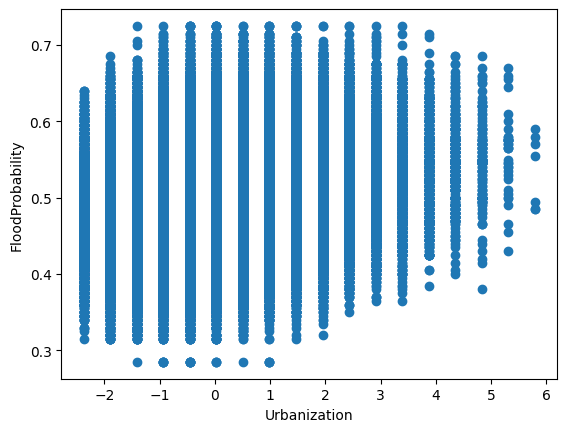

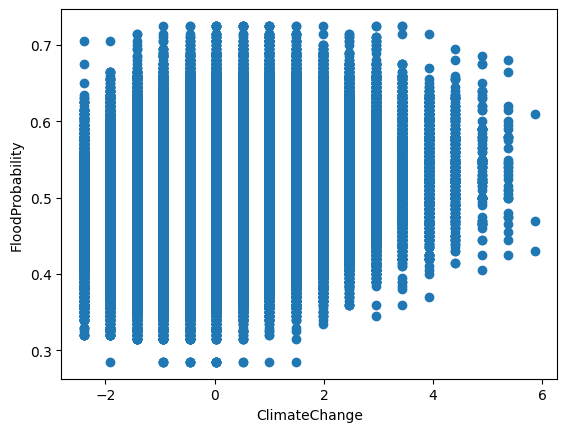

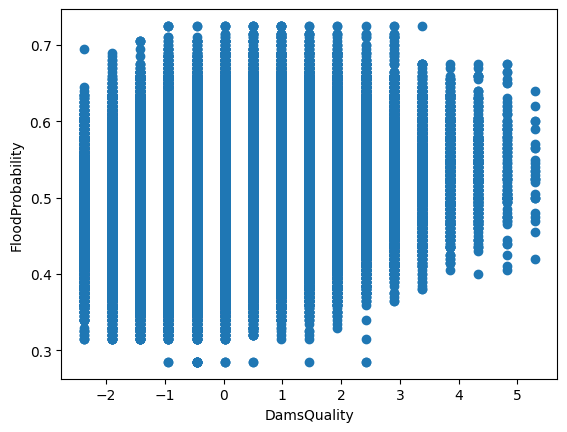

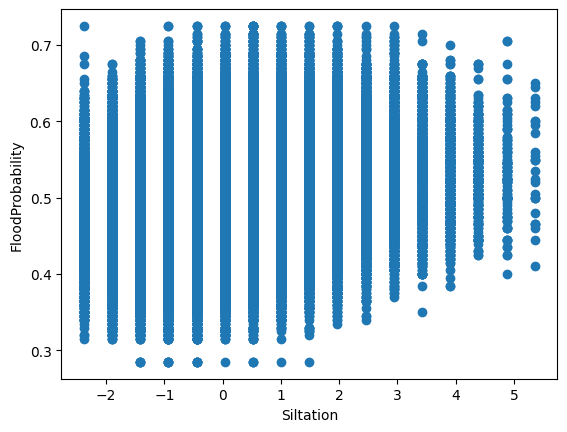

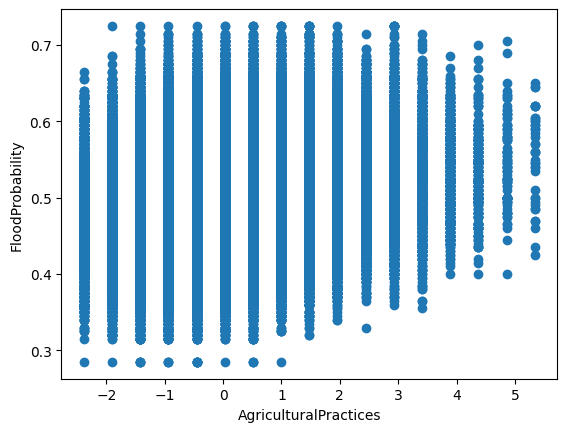

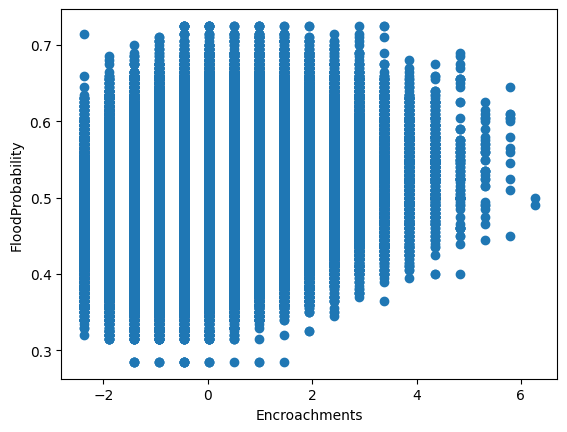

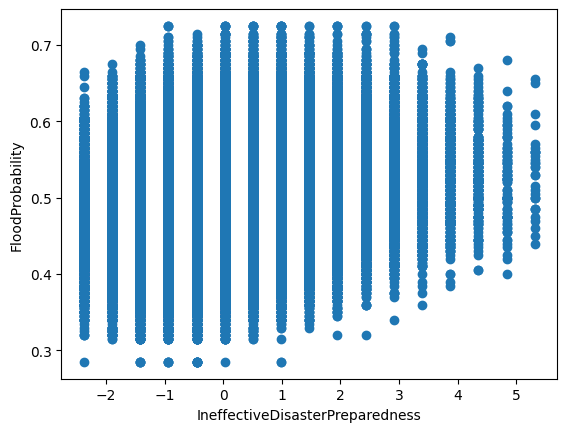

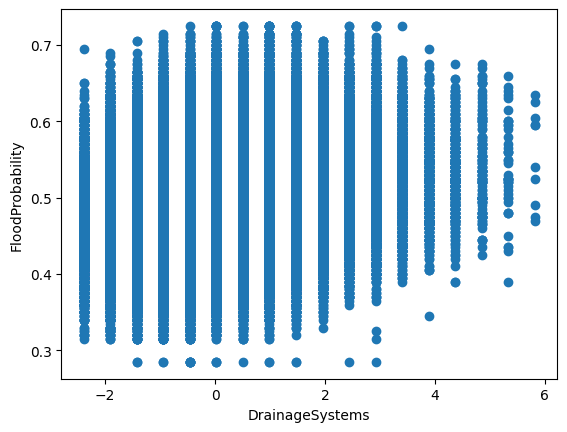

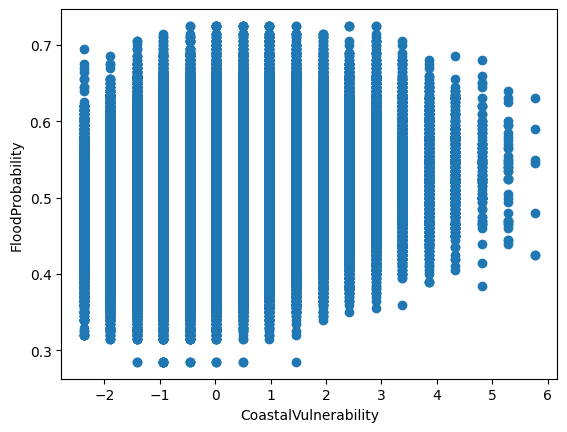

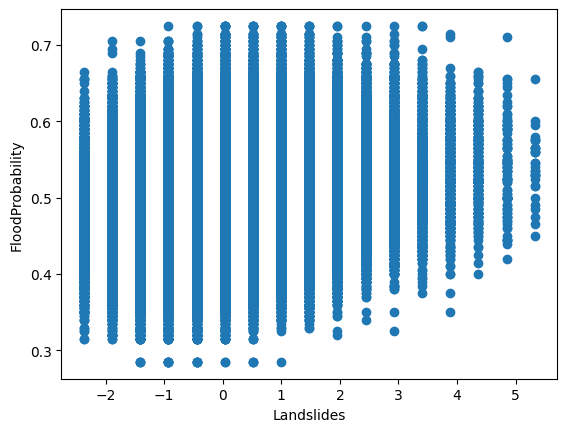

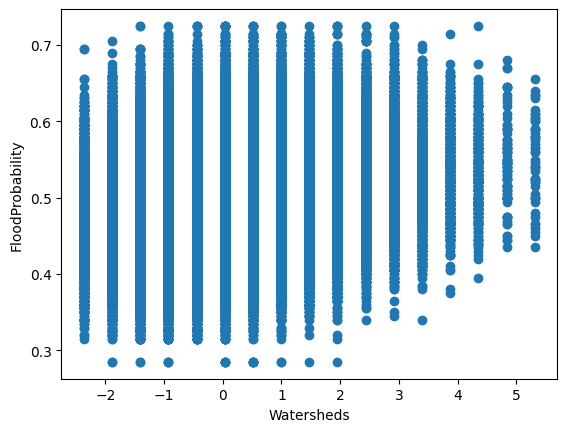

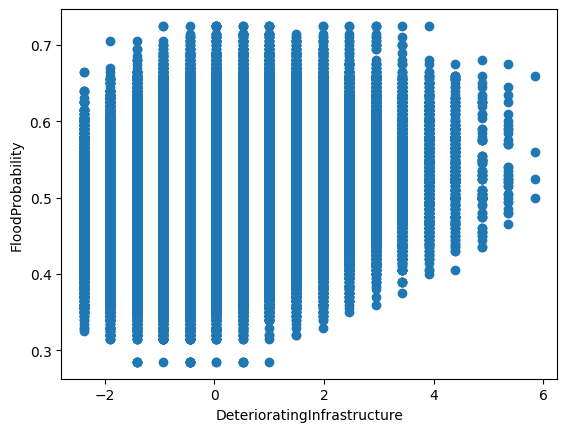

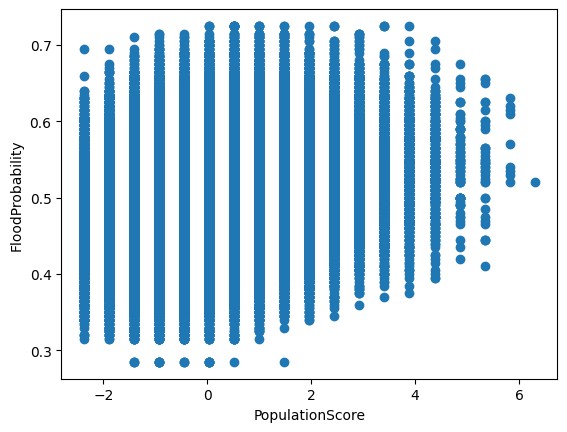

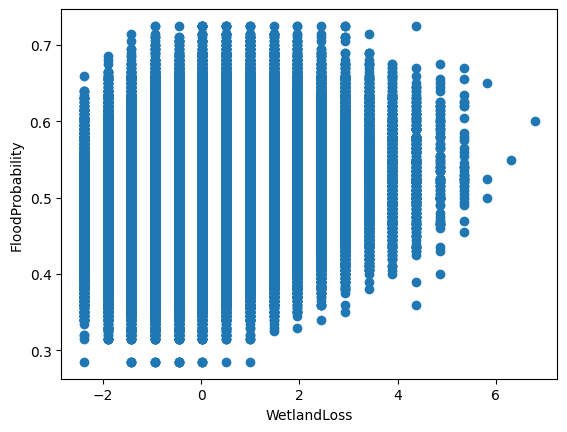

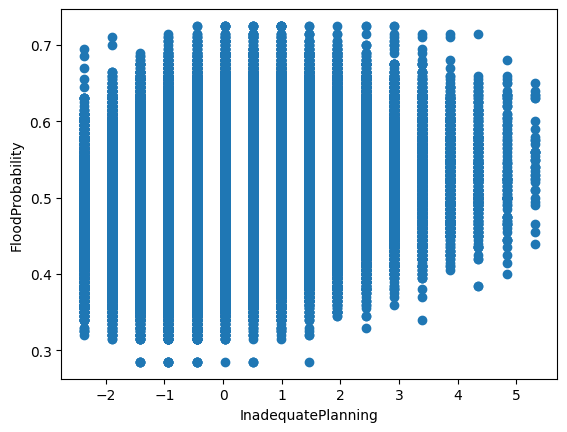

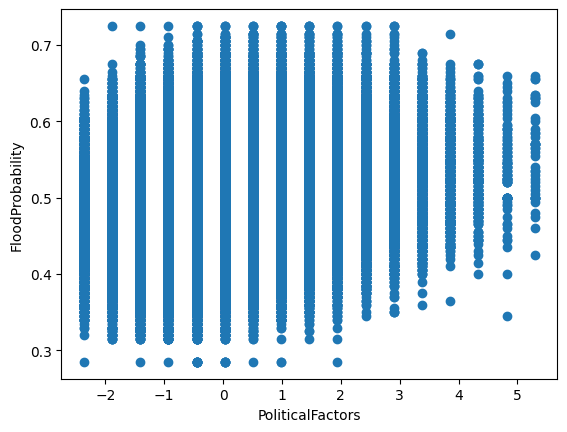

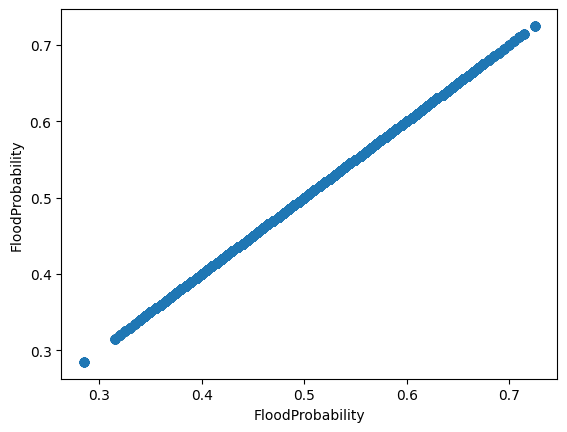

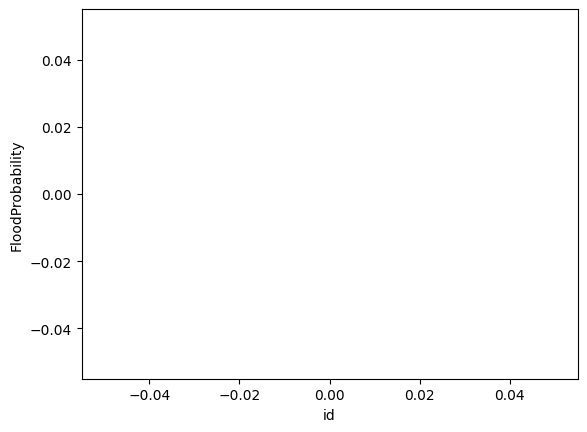

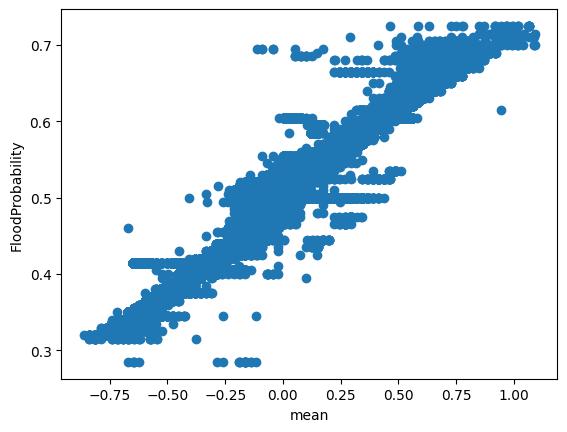

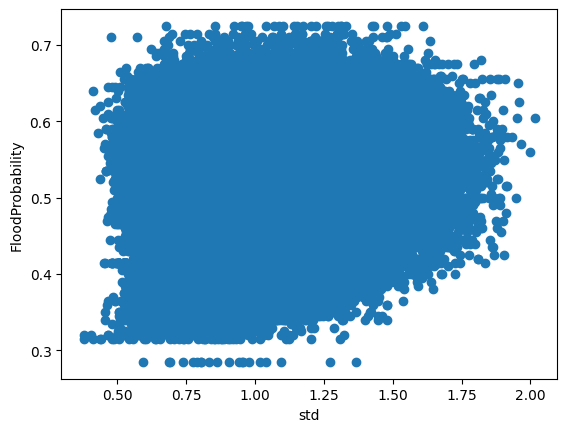

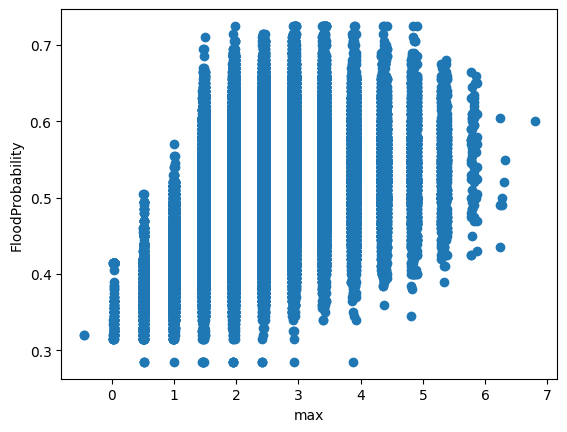

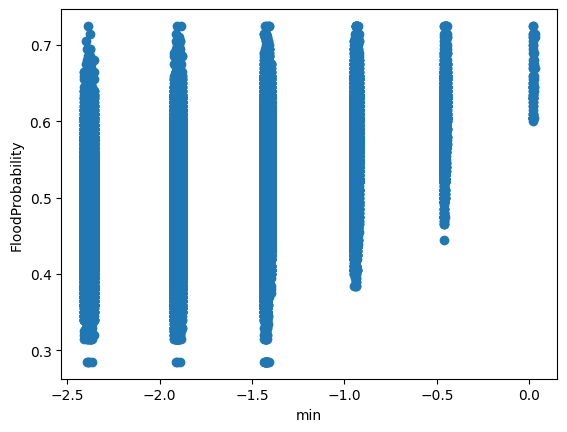

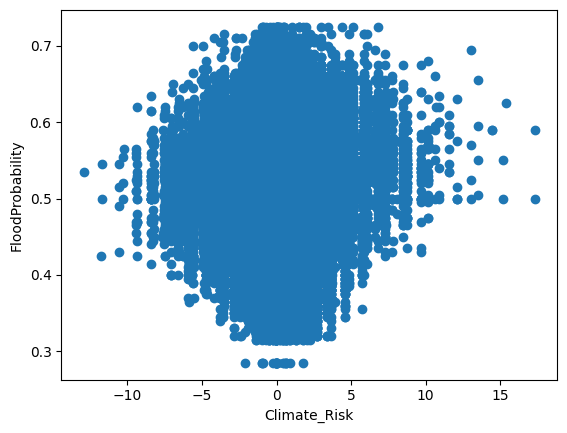

In [10]:
for feature in df_train.columns[:-1]:
    plt.scatter(df_train[feature], df_train['FloodProbability'])
    plt.xlabel(feature)
    plt.ylabel('FloodProbability')
    plt.show()

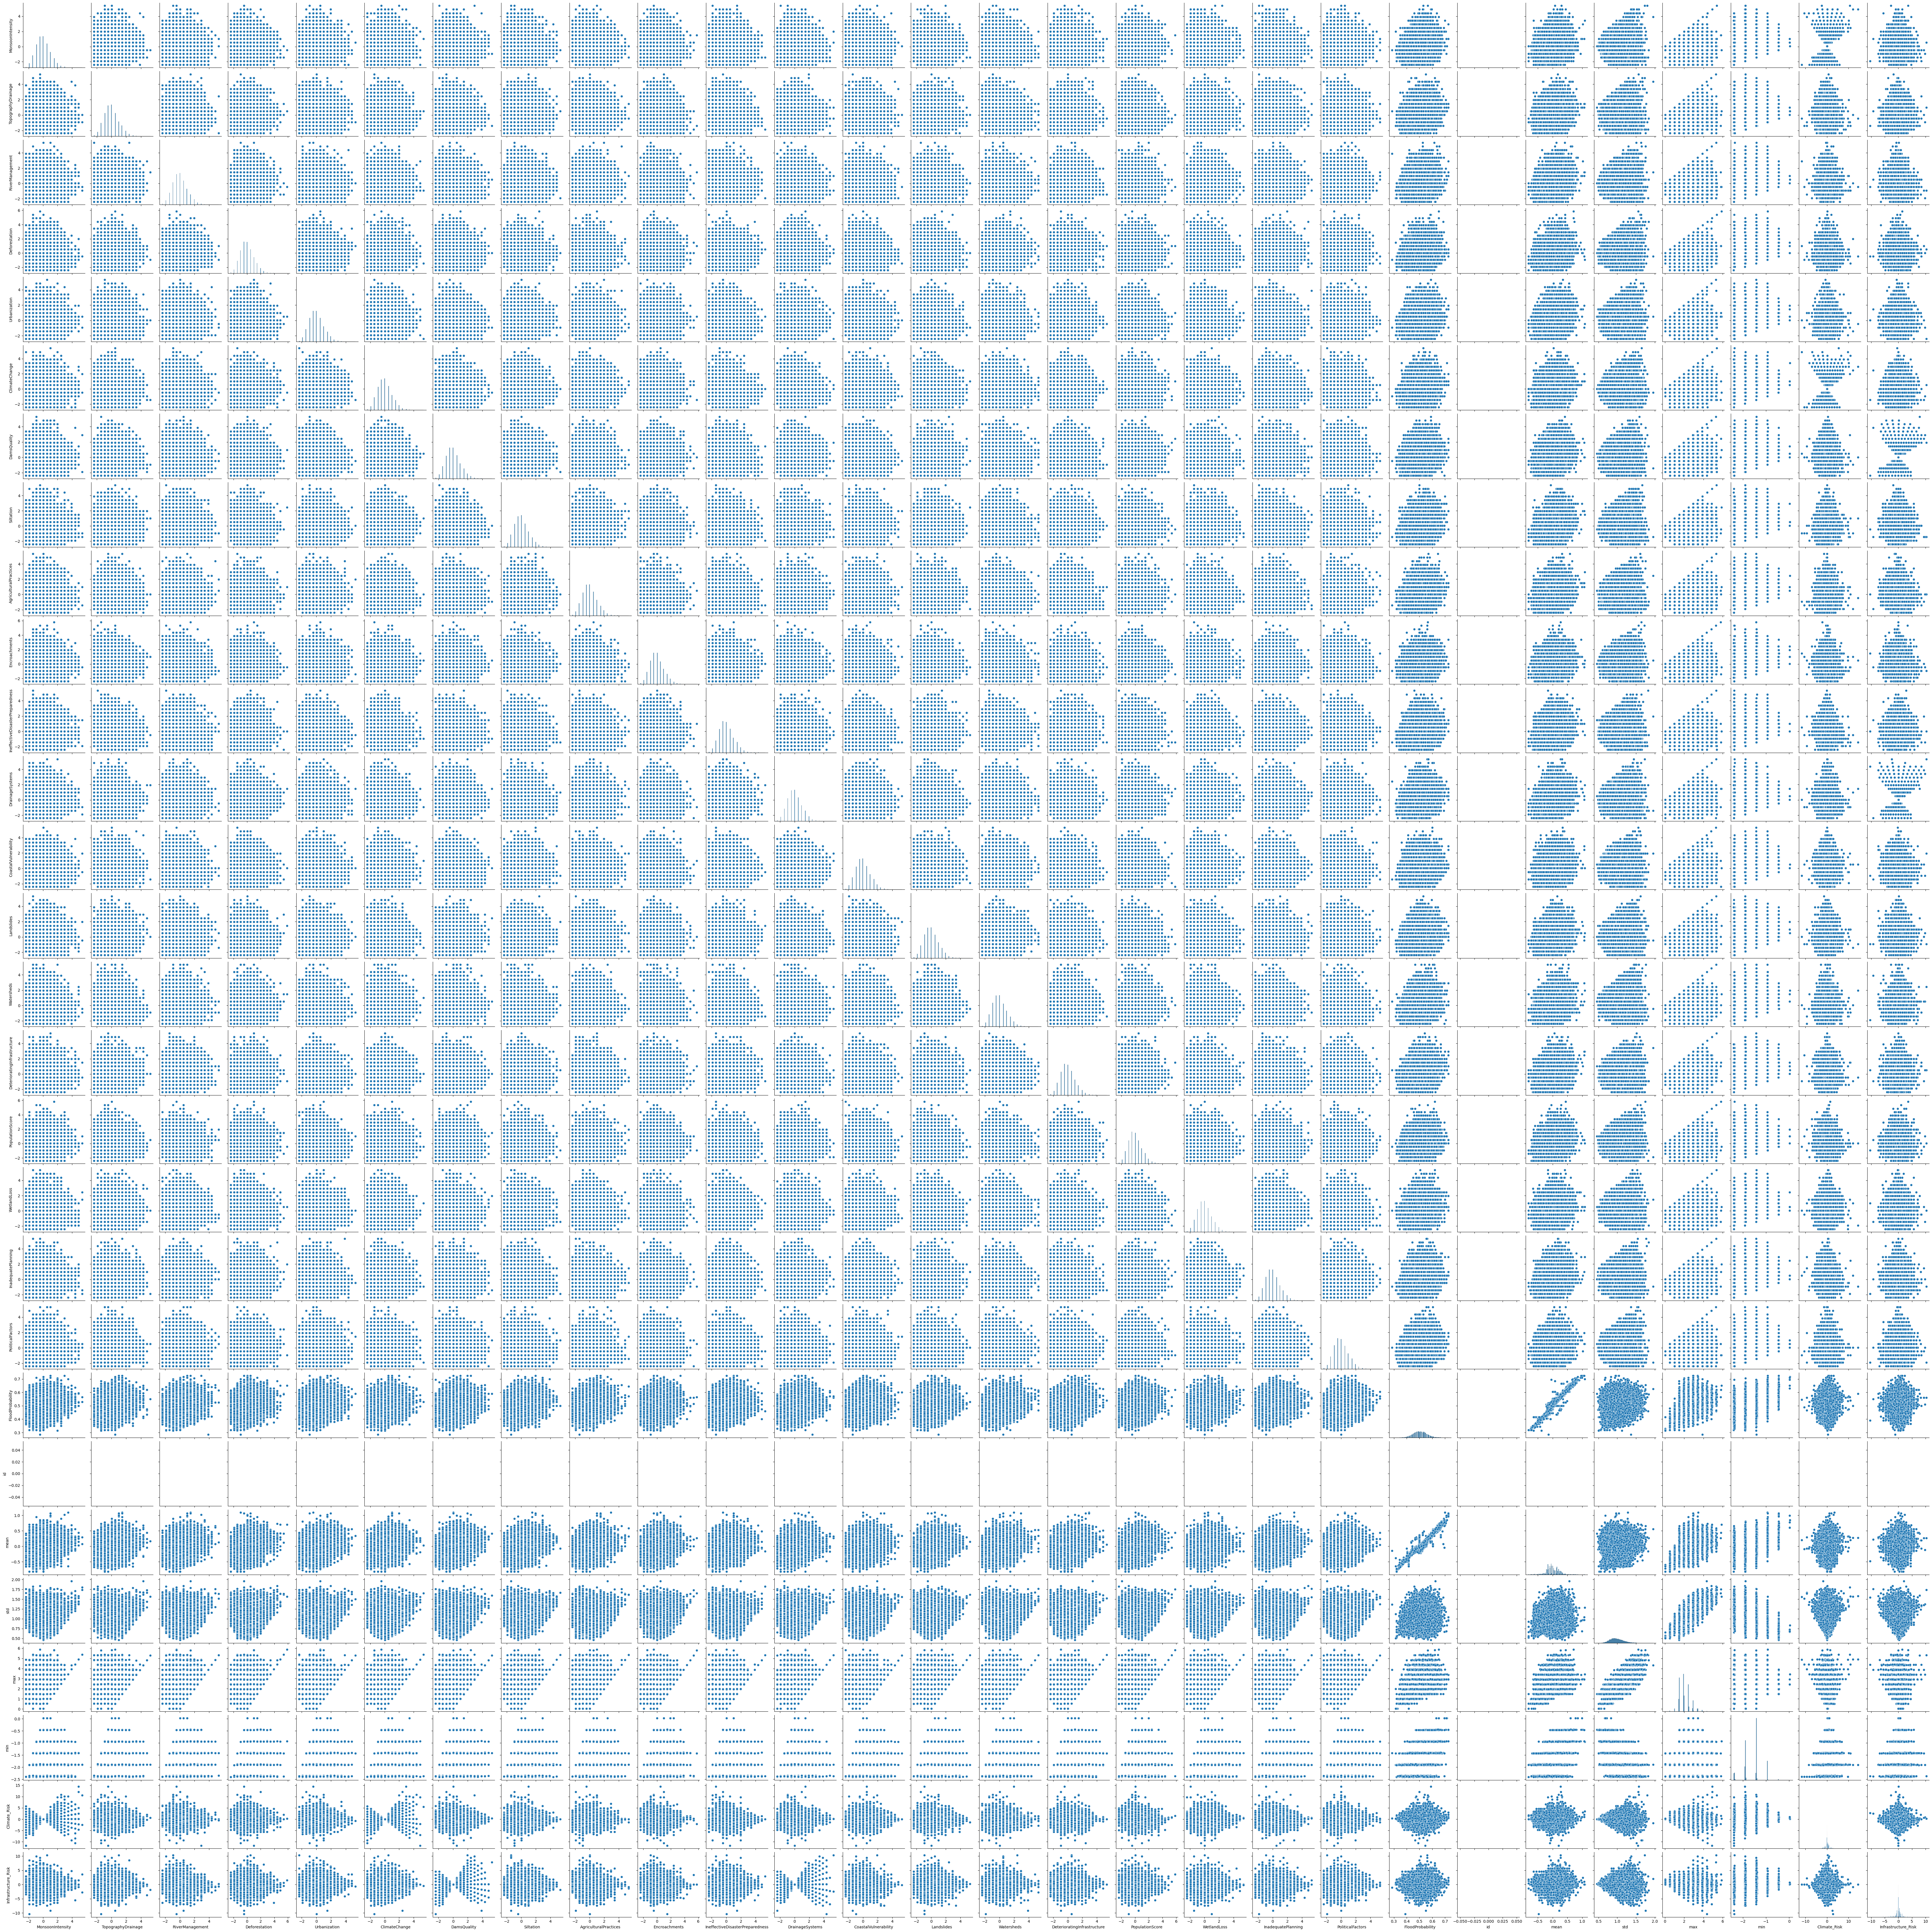

In [11]:
df_sample = df_train.sample(frac=0.05)
sns.pairplot(df_sample)
plt.show()


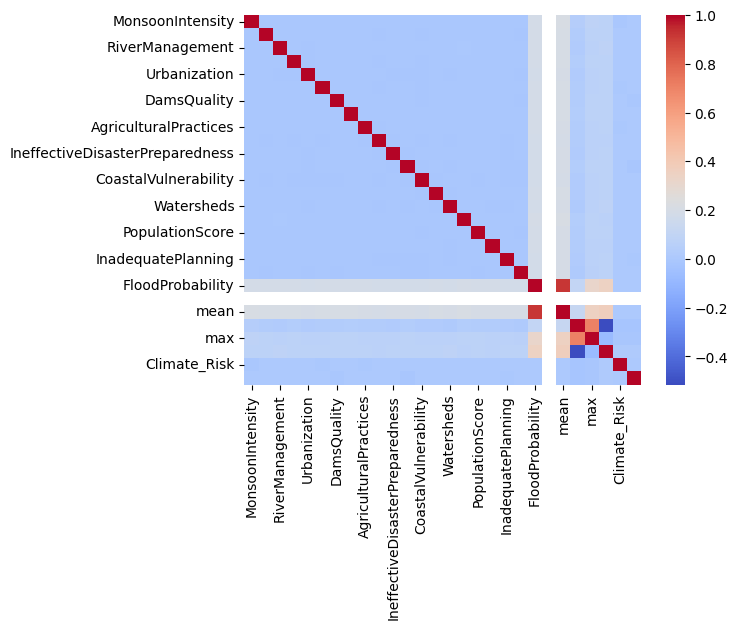

In [12]:
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

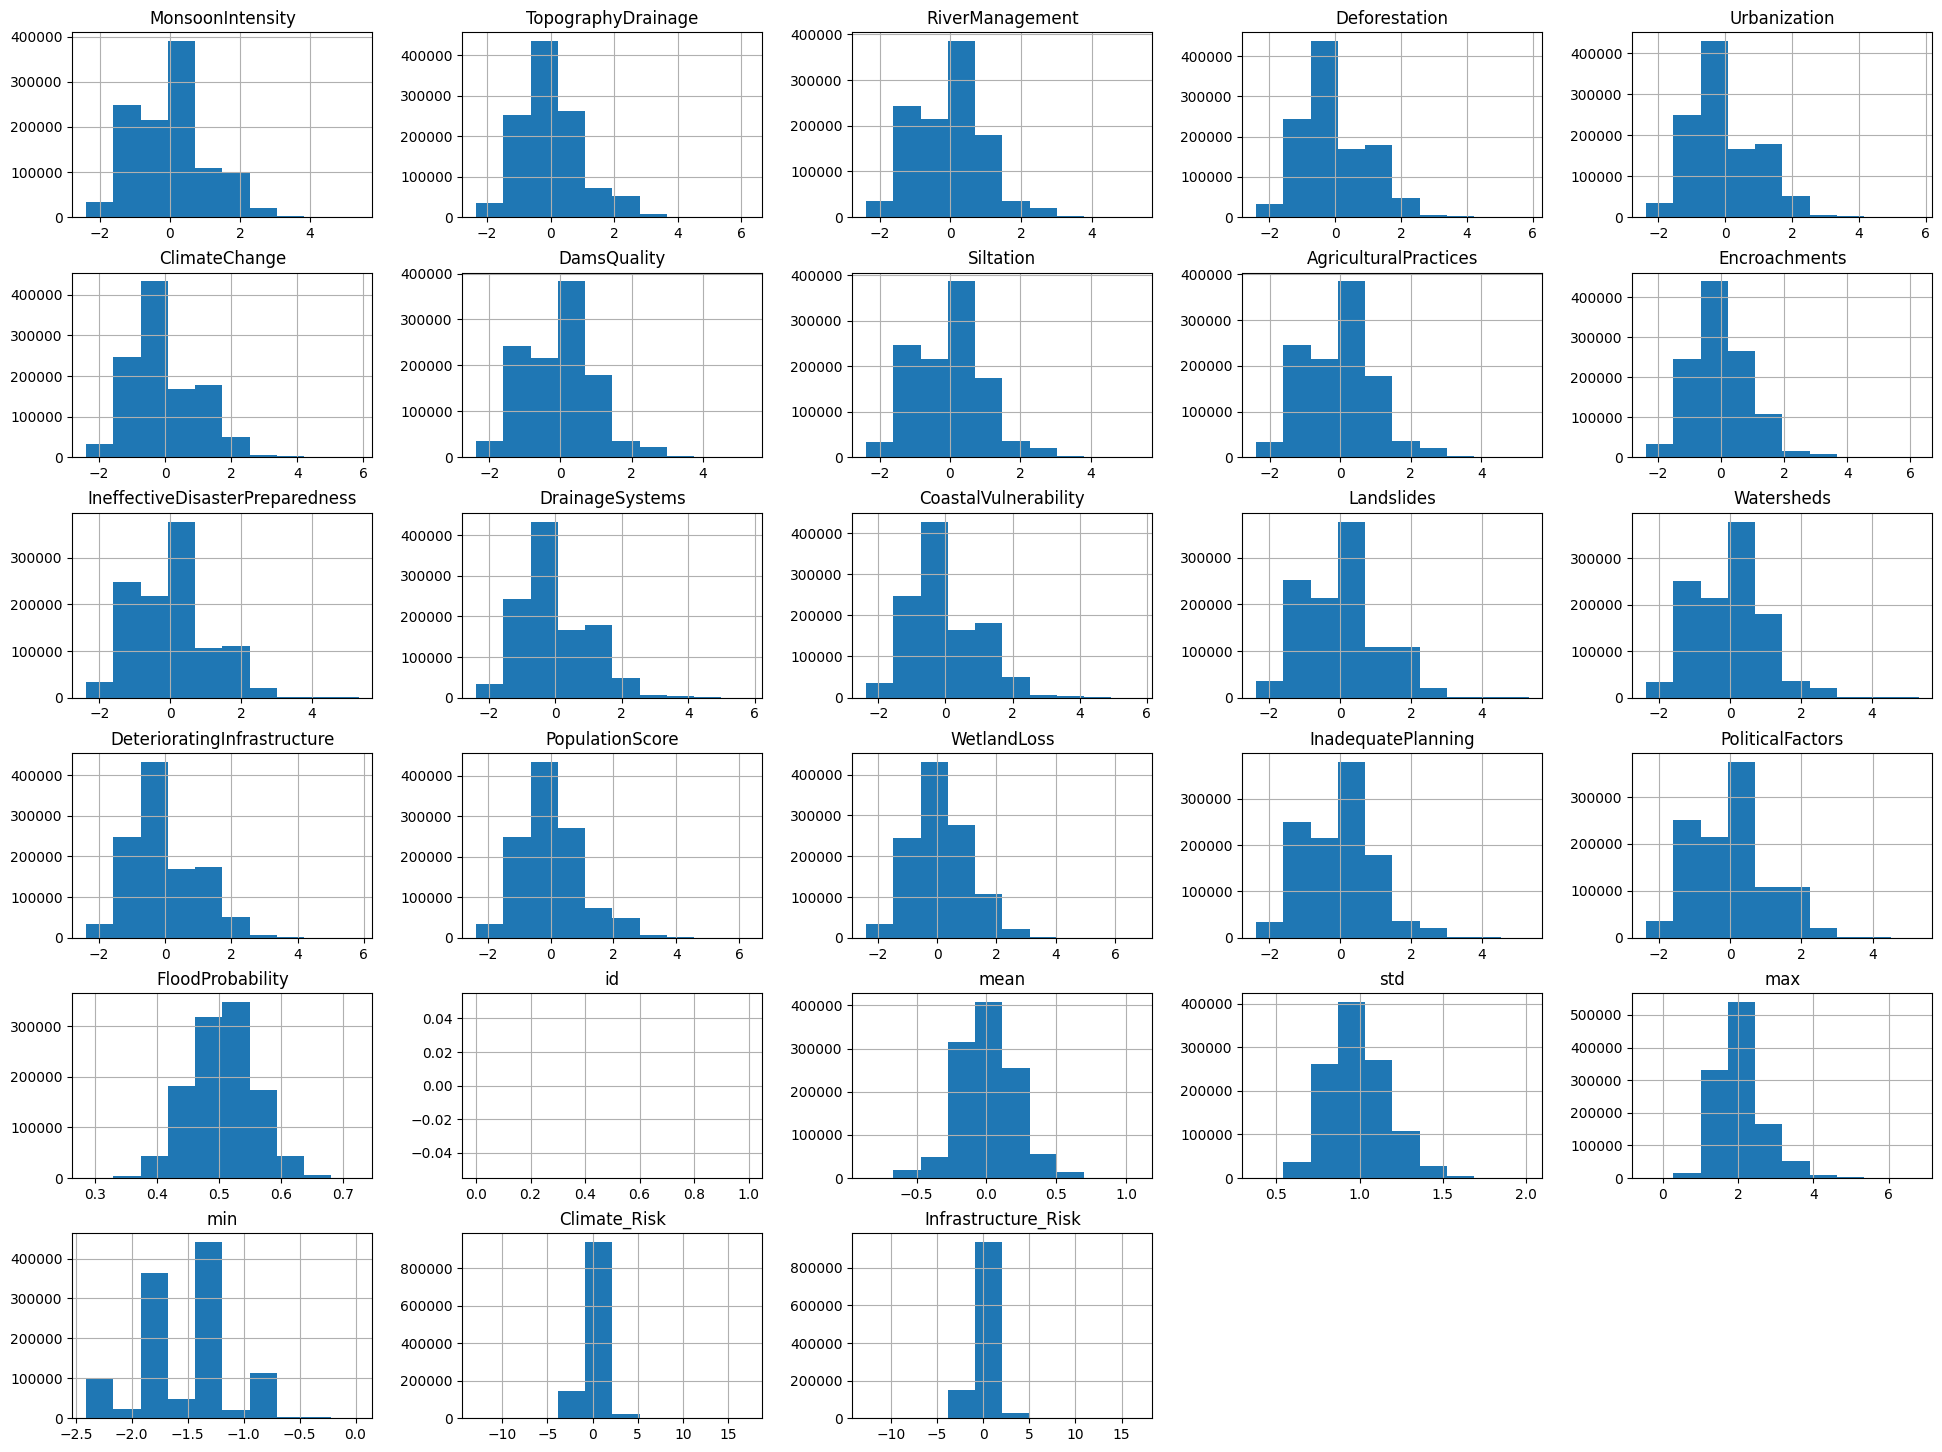

In [13]:
df_train.hist(figsize=(24, 18))
plt.show()

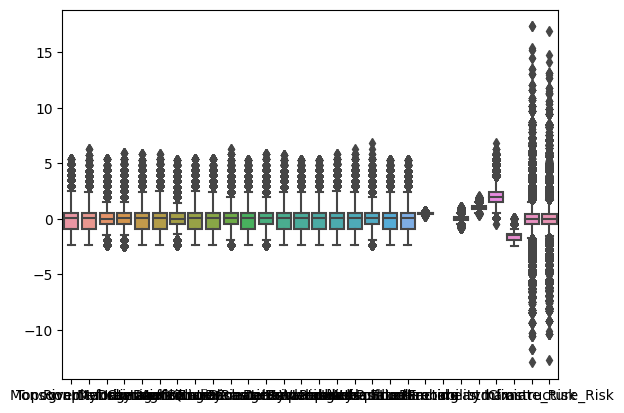

In [14]:
sns.boxplot(data=df_train)
plt.show()

# Analysing Various Regression type Models

### Kfolds = 5

In [20]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'SGD Regressor': SGDRegressor(), 
    'Bayesian Ridge Regression': BayesianRidge(),
    'Bagging Regressor': BaggingRegressor(base_estimator=lgb.LGBMRegressor(verbose=-1)),
    'XGBoost Regressor': xgb.XGBRegressor(),
    'LightGBM Regressor': lgb.LGBMRegressor(verbose=-1),
}

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


for name, model in models.items():
    mse_values = []
    r2_values = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        r2_values.append(r2_score(y_val, y_pred))
    avg_r2 = np.mean(r2_values)
    print(f'{name}: R2 = {avg_r2:.4f}')

Linear Regression: R2 = 0.8451
Ridge Regression: R2 = 0.8451
SGD Regressor: R2 = 0.8447
Bayesian Ridge Regression: R2 = 0.8451
Bagging Regressor: R2 = 0.8664
XGBoost Regressor: R2 = 0.8663
LightGBM Regressor: R2 = 0.8663


In [25]:
# Create a pipeline with standard scaler and a voting regressor
voting_reg = make_pipeline(StandardScaler(),
                           VotingRegressor([
                               ('XGBoost Regressor', xgb.XGBRegressor()),
                               ('LightGBM Regressor', lgb.LGBMRegressor(verbose=-1)),
                               ('Bagging Regressor', BaggingRegressor(base_estimator=lgb.LGBMRegressor(verbose=-1))),
                               ('Bayesian Ridge Regression', BayesianRidge()),
                               ('SGD Regressor', SGDRegressor()),
                               ('Ridge Regression', Ridge()),
                               ('Linear Regression', LinearRegression())
                           ]))

# Train the model with cross-validation and evaluate using mean squared error and R2 score
scores = cross_val_score(voting_reg, X_train, y_train, cv=5, scoring='r2')
r2 = scores[1].mean()
print(f'R2 (CV) = {r2:.4f}')

# Train the final model and make predictions
voting_reg.fit(X_train, y_train)
y_pred = voting_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 = {r2:.4f}')

# Create a stacking regressor with a ridge regression as the final estimator
stacking_reg = make_pipeline(StandardScaler(),
                             StackingRegressor(estimators=[
                                 ('XGBoost Regressor', xgb.XGBRegressor()),
                                 ('LightGBM Regressor', lgb.LGBMRegressor()),
                                 ('Bagging Regressor', BaggingRegressor(base_estimator=LinearRegression())),
                                 ('Bayesian Ridge Regression', BayesianRidge()),
                                 ('SGD Regressor', SGDRegressor()),
                                 ('Ridge Regression', Ridge()),
                                 ('Linear Regression', LinearRegression())
                             ], final_estimator=Ridge()))

# Train the model with cross-validation and evaluate using mean squared error and R2 score
scores = cross_val_score(stacking_reg, X_train, y_train, cv=5, scoring='r2')
r2 = scores[1].mean()
print(f'R2 (CV) = {r2:.4f}')

# Train the final model and make predictions
stacking_reg.fit(X_train, y_train)
y_pred = stacking_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 = {r2:.4f}')

R2 (CV) = 0.8578
R2 = 0.8606
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.375173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 26
[LightGBM] [Info] Start training from score 0.504453
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.292381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 572393, number of used features: 26
[LightGBM] [Info] Start training from score 0.504452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.281769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 572393, number of used features

> **Voting Regressor**                                                
R2(CV) : 0.8578                                             
R2 : 0.8606

> **Stacking Regressor**                                                
R2(CV) : 0.8649                                     
R2 : 0.8692

# Analysing different architechture Neural Networks

## Dense + Dropout NN

> Train R2: 0.80, Test R2: 0.80

In [ ]:
def build_model_1():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(96, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model1 = build_model_1()

# 1. Learning Rate Scheduler: ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# 2. Model Checkpoint: Save the best model based on validation loss
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Model training with History
history = model1.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, reduce_lr, checkpoint])

# Calculate R2 scores
train_r2 = r2_score(y_train, model1.predict(X_train))
test_r2 = r2_score(y_test, model1.predict(X_test))
print(f'Train R2: {train_r2:.2f}, Test R2: {test_r2:.2f}')

# Plotting the training and validation loss
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='train')
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='validation') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss During Training') 
plt.show()

# Plotting the R2 score during training
plt.plot(np.arange(len(history.history['loss'])), [r2_score(y_train, model.predict(X_train)) for _ in range(len(history.history['loss']))], label='train')
plt.plot(np.arange(len(history.history['val_loss'])), [r2_score(y_test, model.predict(X_test)) for _ in range(len(history.history['val_loss']))], label='validation') 
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.title('R2 Score During Training') 
plt.show()

In [ ]:
import torch
import tensorflow as tf
import gc
torch.cuda.empty_cache()
tf.keras.backend.clear_session()
gc.collect()
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

## Dense + Dropout + BatchNormalization NN

> Train R2: 0.86, Test R2: 0.86

In [ ]:
def build_model_2():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(96, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model2 = build_model_2()

# Advanced Concepts:
# 1. Learning Rate Scheduler: ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# 2. Model Checkpoint: Save the best model based on validation loss
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model training with History
history = model2.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, reduce_lr, checkpoint])

# Calculate R2 scores
train_r2 = r2_score(y_train, model2.predict(X_train))
test_r2 = r2_score(y_test, model2.predict(X_test))
print(f'Train R2: {train_r2:.2f}, Test R2: {test_r2:.2f}')

# Plotting the training and validation loss
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='train')
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='validation') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss During Training') 
plt.show()

# Plotting the R2 score during training
plt.plot(np.arange(len(history.history['loss'])), [r2_score(y_train, model2.predict(X_train)) for _ in range(len(history.history['loss']))], label='train')
plt.plot(np.arange(len(history.history['val_loss'])), [r2_score(y_test, model2.predict(X_test)) for _ in range(len(history.history['val_loss']))], label='validation') 
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.title('R2 Score During Training') 
plt.show()

In [ ]:
import torch
import tensorflow as tf
import gc
torch.cuda.empty_cache()
tf.keras.backend.clear_session()
gc.collect()
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

## Conv1D + Flatten + Dense NN
> Train R2: 0.83, Test R2: 0.84

In [ ]:
def build_model_3():
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Flatten()) 
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1)) 
    model.compile(optimizer='adam', loss='mse')
    return model

model3 = build_model_3()

# Advanced Concepts:
# 1. Learning Rate Scheduler: ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# 2. Model Checkpoint: Save the best model based on validation loss
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model training with History
history = model3.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, reduce_lr, checkpoint])

# Calculate R2 scores
train_r2 = r2_score(y_train, model3.predict(X_train))
test_r2 = r2_score(y_test, model3.predict(X_test))
print(f'Train R2: {train_r2:.2f}, Test R2: {test_r2:.2f}')

# Plotting the training and validation loss
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='train')
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='validation') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss During Training') 
plt.show()

# Plotting the R2 score during training
plt.plot(np.arange(len(history.history['loss'])), [r2_score(y_train, model3.predict(X_train)) for _ in range(len(history.history['loss']))], label='train')
plt.plot(np.arange(len(history.history['val_loss'])), [r2_score(y_test, model3.predict(X_test)) for _ in range(len(history.history['val_loss']))], label='validation') 
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.title('R2 Score During Training') 
plt.show()

In [ ]:
import torch
import tensorflow as tf
import gc
torch.cuda.empty_cache()
tf.keras.backend.clear_session()
gc.collect()
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

# Generating the submission using Stacking Regressor

In [28]:
df_test=df_test.drop("id", axis=1)
df_test=df_test.drop("FloodProbability", axis=1)
df_test.head()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0         -0.446964            0.511889        -0.944596       0.027398   
1         -0.446964           -0.443233        -1.427222       1.976664   
2         -1.905859           -0.920793         0.503280       0.027398   
3         -1.419560           -0.443233        -0.461971       0.514715   
4          0.525633           -0.920793        -1.427222      -0.459918   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0      0.508518       1.003786     1.459119   1.002626               1.476127   
1      0.028386       0.032130    -0.458827   1.002626               0.027194   
2      0.988650      -1.425354    -0.458827   0.518795              -0.455784   
3     -0.451746       0.032130    -0.458827  -0.932697              -0.455784   
4      0.508518      -0.453698     0.020659   0.034964              -0.938761   

   Encroachments  ...  PopulationScore  WetlandLoss  InadequatePlanning  \
0      -0.456037  ...         0.517220    -0.459420           -0.452061   
1      -0.456037  ...         0.999385    -0.459420           -0.452061   
2      -1.416332  ...        -0.929273     0.507897            1.470716   
3      -0.456037  ...        -0.447108    -1.426738           -0.452061   
4       0.984405  ...         1.481549    -0.459420            0.028633   

   PoliticalFactors      mean       std       max       min  Climate_Risk  \
0          0.028255  0.293227  0.773135  1.476127 -0.944596     -0.448656   
1         -0.929064 -0.210771  0.921803  1.976664 -1.901065     -0.014361   
2         -0.929064 -0.212229  1.088162  1.956376 -1.905859      2.716524   
3         -0.450405 -0.163809  0.773841  1.473828 -1.426738     -0.045611   
4          0.028255 -0.163368  0.774186  1.481549 -1.427222     -0.238479   

   Infrastructure_Risk  
0             0.038206  
1             0.209392  
2            -0.897639  
3            -0.676233  
4            -0.019397  

[5 rows x 26 columns]

In [30]:
sample_sub["FloodProbability"]=stacking_reg.predict(df_test)
sample_sub.to_csv("submission.csv", index=False)

In [ ]:
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
sample_sub["FloodProbability"]=xgb_model.predict(df_test)
sample_sub.to_csv("submission.csv", index=False)

> **Stacking Regressor**  Public Score : 0.86663                                   
> **XGBRegressor**  Public Score : 0.86631

# Let's Fine-Tune the hyperparameters for XGBRegressor, LGBMRegressor and then blending the predictions...

In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
    }

    # Split data into training and validation sets
    X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(
        X_train, y_train, test_size=0.2, random_state=trial.number
    )

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train_fold, label=y_train_fold)
    dvalid = xgb.DMatrix(X_val_fold, label=y_val_fold)

    model = xgb.train(
        params, 
        dtrain, 
        evals=[(dvalid, "validation")],  
        early_stopping_rounds=20,       
        verbose_eval=False               
    )
    
    # Get the best score from the trained model
    best_score = model.best_score

    # Report the best score as the objective value
    return best_score  

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

xgb_best_params = study.best_params
print("Best parameters:", xgb_best_params)

In [32]:
import optuna.visualization as ov

# Plot optimization history
ov.plot_optimization_history(study)

# Plot parameter importance
ov.plot_param_importances(study)

# Plot slice plot (interactive)
ov.plot_slice(study)

In [11]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ... (Assuming X_train and y_train are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', -1, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'objective': 'regression',  
        'metric': 'rmse',         
        'verbose': -1,
    }

    X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(
        X_train, y_train, test_size=0.2, random_state=trial.number
    )
    
    # Create LightGBM datasets 
    dtrain = lgb.Dataset(X_train_fold, label=y_train_fold)
    dvalid = lgb.Dataset(X_val_fold, label=y_val_fold)

    # Train with early stopping
    model = lgb.train(
        params, 
        dtrain, 
        valid_sets=[dvalid],
    )

    # Predict and calculate RMSE on validation set
    y_pred = model.predict(X_val_fold)
    rmse = mean_squared_error(y_val_fold, y_pred, squared=False)

    # Optuna minimizes the objective, so return the RMSE directly
    return rmse 

# Create study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

lgb_best_params = study.best_params
print("Best parameters:", lgb_best_params)


[I 2024-06-22 16:34:10,316] A new study created in memory with name: no-name-18c28954-e733-4c87-898d-0ce205750216
[I 2024-06-22 16:34:51,276] Trial 0 finished with value: 0.029435204580655516 and parameters: {'n_estimators': 520, 'max_depth': 5, 'learning_rate': 0.0016767500120237087, 'subsample': 0.8731835963815946, 'colsample_bytree': 0.8231932078762869, 'reg_alpha': 2.052267456661493e-06, 'reg_lambda': 0.16144346377700636, 'num_leaves': 137, 'min_child_samples': 96}. Best is trial 0 with value: 0.029435204580655516.
[I 2024-06-22 16:37:15,996] Trial 1 finished with value: 0.027170115324824013 and parameters: {'n_estimators': 892, 'max_depth': 11, 'learning_rate': 0.001165688906941226, 'subsample': 0.9808357965405882, 'colsample_bytree': 0.7786709142491643, 'reg_alpha': 1.8730468222073438e-07, 'reg_lambda': 2.790311857849107e-08, 'num_leaves': 203, 'min_child_samples': 62}. Best is trial 1 with value: 0.027170115324824013.
[I 2024-06-22 16:37:36,547] Trial 2 finished with value: 0.05

Best parameters: {'n_estimators': 823, 'max_depth': 0, 'learning_rate': 0.0237316266021058, 'subsample': 0.7160083897525207, 'colsample_bytree': 0.917026104617092, 'reg_alpha': 3.709194883258075e-05, 'reg_lambda': 0.0004389531213863141, 'num_leaves': 76, 'min_child_samples': 96}


In [13]:
import optuna.visualization as ov

# Plot optimization history
ov.plot_optimization_history(study)

# Plot parameter importance
ov.plot_param_importances(study)

# Plot slice plot (interactive)
ov.plot_slice(study)

In [29]:
optuna_xgb_params={'n_estimators': 160, 'max_depth': 3, 'learning_rate': 0.010764655250991451, 'subsample': 0.9665734102634232, 'colsample_bytree': 0.6544043152953372, 'gamma': 0.0015546399226326925, 'reg_alpha': 1.2907247281476344e-06, 'reg_lambda': 6.371675646557661e-08}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
optuna_xgb=xgb.XGBRegressor(**optuna_xgb_params)
optuna_xgb.fit(X_train, y_train)
sample_sub["FloodProbability_xgb"]=optuna_xgb.predict(df_test)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
optuna_lgb=lgb.LGBMRegressor(**lgb_best_params, verbose=-1)
optuna_lgb.fit(X_train, y_train)
sample_sub["FloodProbability_lgb"]=optuna_lgb.predict(df_test)

In [31]:
sample_sub["FloodProbability"]=(sample_sub["FloodProbability_lgb"]+sample_sub["FloodProbability_xgb"])/2
sample_sub.drop(["FloodProbability_lgb", "FloodProbability_xgb"], axis=1, inplace=True)
sample_sub.set_index("id", axis=1, inplace=True)
sample_sub

FloodProbability
id                       
1117957          0.553867
1117958          0.468307
1117959          0.469597
1117960          0.478806
1117961          0.480089
...                   ...
1863257          0.479423
1863258          0.464554
1863259          0.590292
1863260          0.528349
1863261          0.520934

[745305 rows x 1 columns]

In [33]:
sample_sub.to_csv("submission.csv")

> **Optuna XGBRegressor and LGBMRegressor Blended** Public Score : 0.86679